- para agregar pesos a las aristas
-semana5

In [1]:
%%file 0502.al
1 2 3 2 4 9
0 2 2 1 3 2 5 2
1 1 4 2 6 2
0 2 1 2 5 9 7 3
0 9 2 2 7 8
1 2 3 9 6 7
2 2 5 7 7 3
3 3 4 8 6 3

Writing 0502.al


In [2]:
with open("0502.al") as f:
  G = []
  for line in f:
    nums = [int(x) for x in line.split()]
    G.append([])
    for i in range(0, len(nums), 2):
      G[-1].append((nums[i], nums[i+1]))

for x in G:
  print(x)

[(1, 2), (3, 2), (4, 9)]
[(0, 2), (2, 1), (3, 2), (5, 2)]
[(1, 1), (4, 2), (6, 2)]
[(0, 2), (1, 2), (5, 9), (7, 3)]
[(0, 9), (2, 2), (7, 8)]
[(1, 2), (3, 9), (6, 7)]
[(2, 2), (5, 7), (7, 3)]
[(3, 3), (4, 8), (6, 3)]


In [9]:
import heapq as hq
import numpy as np
import graphviz as gv
import math
def drawG_al(G, directed=False, weighted=False, path=[], layout="sfdp"):
  graph = gv.Digraph("felicidad") if directed else gv.Graph("alegria")
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        graph.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v, w in G[u]:
      draw = False
      if not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        draw = True
      elif directed:
        draw = True
      if draw:
        if weighted:
          graph.edge(str(u), str(v), str(w))
        else:
          graph.edge(str(u), str(v))
  return graph

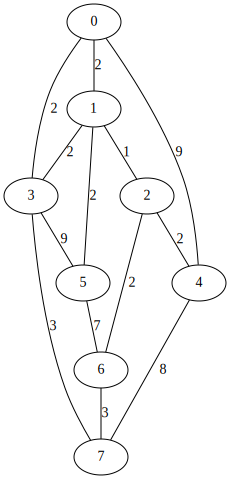

In [10]:
drawG_al(G, weighted=True)
##el segundo datos  es el peso y el primero es a donde va